In [33]:
import os
import shutil
from pathlib import Path
HOME = os.getcwd()
print(HOME)

/mnt/d/LocalGit/NTNU_mscThesis


In [34]:
# # copy all target file names to a txt list
# with open("obj_image_filenames.txt", "w") as a:
#     for path, subdirs, files in os.walk(r'./datasets/labels_withObj'):
#        for filename in files:
#         #  f = os.path.join(path, filename)
#          a.write((str(filename) + os.linesep).replace(".txt", ".jpg",-1))

In [35]:
# # copy all files from a text list to a desired folder

# fileListingFile = "obj_image_filenames.txt"

# imgto = "datasets/bad"
# imgfrom = "datasets/SeaDronesSee-ODV2-2/train/images"

# with open(fileListingFile, "r") as file:
#     fileNames = [file.strip() for file in file.readlines()]

# fileNames[0]
# for file in fileNames:
#     if os.path.isfile(os.path.join(imgfrom, file)):
#         shutil.copy(os.path.join(imgfrom, file), os.path.join(imgto, file))

In [36]:
# !pip install pybboxes

import cv2
import matplotlib.pyplot as plt
import pybboxes as pbx
import numpy as np

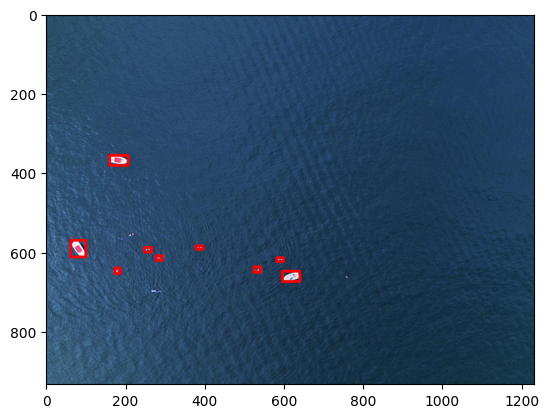

In [58]:
def yolobboxShow(path=os.getcwd(),file_name ="", img_extension = ".jpg", lbl_extension = ".txt"):

    # img = cv2.cvtColor(cv2.imread(path+"images/"+file_name+img_extension), cv2.COLOR_BGR2RGB)
    img = cv2.imread(path+"images/"+file_name+img_extension)
    
    dh, dw, _ = img.shape

    fl = open((path+"labels/"+file_name+lbl_extension), 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 250), 5)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
# show yolo bbox in a single image    
yolobboxShow(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name ="5")

### Function "yolobboxCrop_classification()"
#### Crop out yolo objects and save them in folders corresponding to their classes

Folder structure

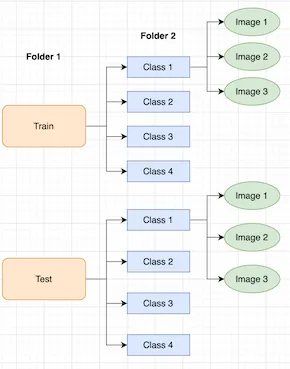

In [48]:

def yolobboxCrop_classification(path=os.getcwd(),file_name ="", img_extension = ".jpg", lbl_extension = ".txt", crop_padding = 0):

    # img = cv2.cvtColor(cv2.imread(path+"images/"+file_name+img_extension))
    img = cv2.imread(os.path.join(path , "images", file_name+img_extension))
    
    H, W = img.shape[:2]

    fl = open(os.path.join(path , "labels", file_name+lbl_extension), 'r')
    data = fl.readlines()
    fl.close()

    for i, dt in enumerate (data):

        # Split string to float
        yoloclass, *yolo_normalized = np.fromstring(dt, dtype=float, sep=' ')[:]    #class, x, y, w, h  as %
        # print( yolo_normalized )
        
        x,y,w,h = pbx.convert_bbox(yolo_normalized, from_type="yolo", to_type="coco", image_size=(W,H)) #box_coco = [x,y,w,h]
        yoloclass = str(int(yoloclass))
        # print(yoloclass,x,y,w,h) 
        # print(box_coco) 
        
        
        # print([x, y, w, h])
        cropped_image = img[y:y+h, x:x+w]
        
        # plt.imshow(cropped_image, interpolation='nearest', aspect='auto')     
        # plt.show()
        Path(os.path.join(path , yoloclass)).mkdir(parents=True, exist_ok=True)
        
        out_file_name = file_name+'_'+str(i)+img_extension
        
        cv2.imwrite(os.path.join(path , yoloclass, out_file_name), cropped_image)
        
        
        # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)   # img, (x,y), (x+w,y+h), (b,g,r)
        
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.show()
    
# crop and save yolo bboxes in a single image 
yolobboxCrop_classification(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name ="9")

### Loop through the whole dataset (or Part of it)

In [59]:
def YOLO2Classification_dataset(label_path="./"):
    # label_path="./datasets/SeaDronesSee-ODV2_yolo/valid/labels"

    # get file names
    for path, subdirs, files in os.walk(label_path):
        for i, filename in enumerate(files):
            
            print(f"Count-{i+1}: ",filename.replace(".txt", "",-1))
            yolobboxCrop_classification(path=label_path.replace("/labels", ""),file_name =filename.replace(".txt", ""))
            
YOLO2Classification_dataset("datasets/SeaDronesSee-ODV2-test/train/labels")

Count-0:  11
Count-1:  12
Count-2:  2
Count-3:  5
Count-4:  7
Count-5:  8
Count-6:  8488
Count-7:  9


In [ ]:
#validation set
YOLO2Classification_dataset("./datasets/SeaDronesSee-ODV2_yolo/valid/labels")

In [60]:
#train set
YOLO2Classification_dataset("./datasets/SeaDronesSee-ODV2_yolo/train/labels")

Count-0:  100
Count-1:  1000
Count-2:  1002
Count-3:  1004
Count-4:  1009
Count-5:  101
Count-6:  1011
Count-7:  10119
Count-8:  10120
Count-9:  10121
Count-10:  10122
Count-11:  10123
Count-12:  10124
Count-13:  10125
Count-14:  10126
Count-15:  10127
Count-16:  10128
Count-17:  10129
Count-18:  1013
Count-19:  10130
Count-20:  10131
Count-21:  10132
Count-22:  10133
Count-23:  10134
Count-24:  10135
Count-25:  10136
Count-26:  10137
Count-27:  10138
Count-28:  10139
Count-29:  1014
Count-30:  10140
Count-31:  10141
Count-32:  10142
Count-33:  10143
Count-34:  10144
Count-35:  10145
Count-36:  10146
Count-37:  10147
Count-38:  10148
Count-39:  10149
Count-40:  10150
Count-41:  10151
Count-42:  10152
Count-43:  10153
Count-44:  10154
Count-45:  10155
Count-46:  10156
Count-47:  10157
Count-48:  10158
Count-49:  10159
Count-50:  10160
Count-51:  10161
Count-52:  10162
Count-53:  10163
Count-54:  10164
Count-55:  10165
Count-56:  10166
Count-57:  10167
Count-58:  10168
Count-59:  10169
C